### Data Visualizations
- This notebook provides visual exploration of the cleaned PJM Hourly Energy Consumption dataset.    
- We will use various plots and charts to understand trends, patterns, seasonality, and relationships within the data.    
- These visualizations will help uncover insights and guide the development of effective forecasting models.  

Here is the full forms of each features present in the dataset -   
- AEP: American Electric Power  
- COMED: Commonwealth Edison  
- DAYTON: Dayton Power & Light  
- DEOK: Duke Energy Ohio/Kentucky  
- DOM: Dominion Virginia Power  
- DUQ: Duquesne Light Company  
- EKPC: East Kentucky Power Cooperative  
- FE: FirstEnergy  
- NI: Northern Indiana Public Service Company  
- PJME: PJM East Region  
- PJMW: PJM West Region  
- PJM_Load: Total PJM System Load (aggregate of all regions)  

In [1]:
## importing required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## opening the dataset
df_cleaned = pd.read_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned.parquet")

In [3]:
df_cleaned.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

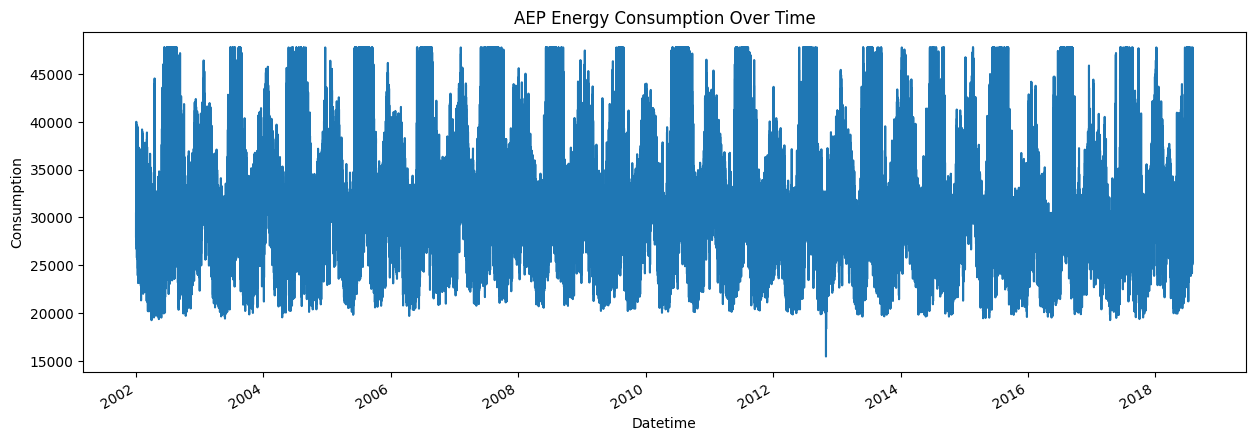

In [ ]:
# Plot energy consumption over time for PJM East region
plt.figure(figsize=(15,5))
df_cleaned['PJME'].plot()
plt.title('AEP Energy Consumption Over Time')
plt.xlabel("Datetime")
plt.ylabel("Consumption")
plt.show()

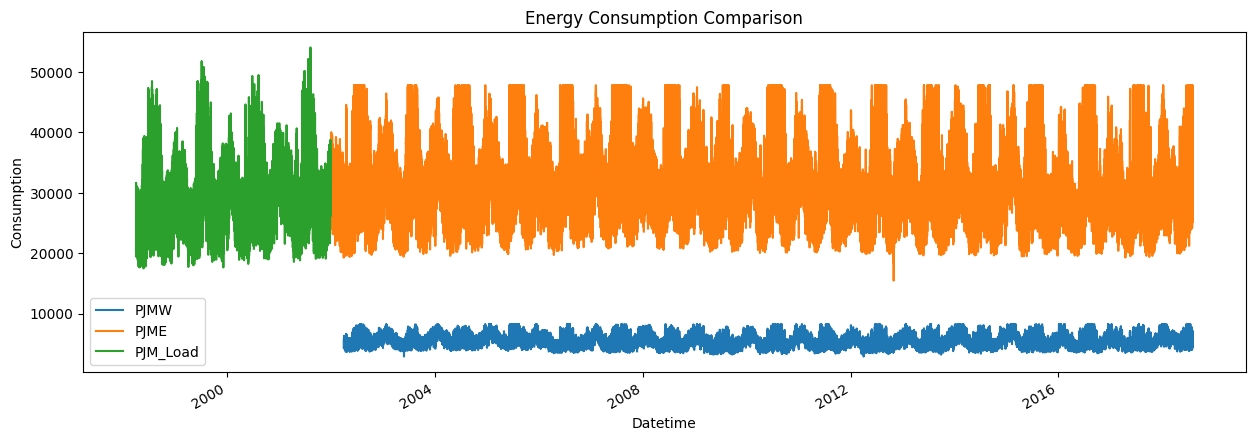

In [ ]:
## Plot energy consumption for PJME, PJMW regions along with PJM_Load
plt.figure(figsize=(15,5))
for col in ['PJMW', 'PJME', 'PJM_Load']:
    df_cleaned[col].plot(label=col)
plt.title('Energy Consumption Comparison')
plt.xlabel('Datetime')
plt.ylabel('Consumption')
plt.legend()
plt.show()

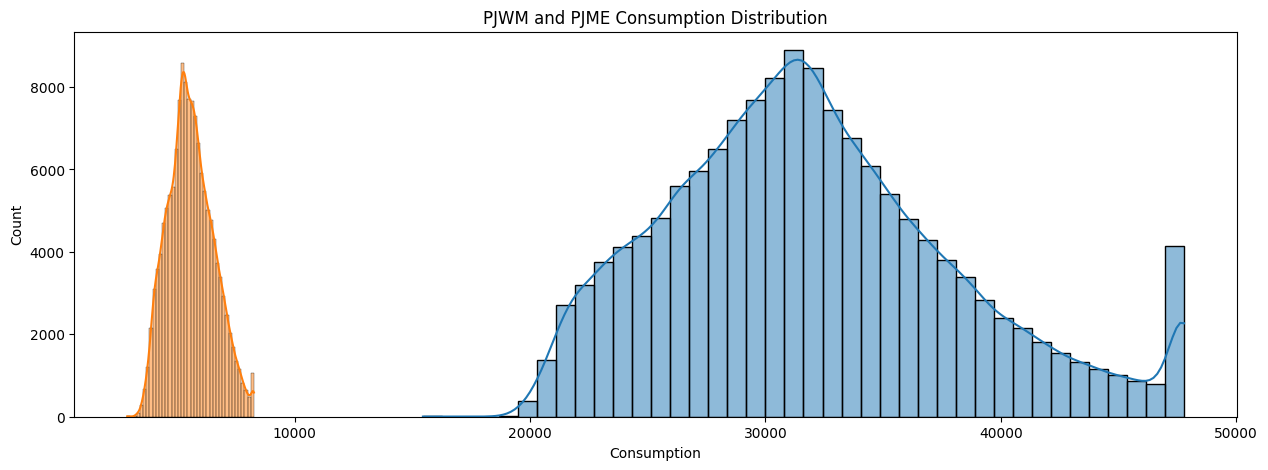

In [11]:
## Plot distribution of AEP consumption
plt.figure(figsize=(15,5))
sns.histplot(df_cleaned['PJME'], bins=40, kde=True)
sns.histplot(df_cleaned['PJMW'], bins=40, kde=True)
plt.title('PJWM and PJME Consumption Distribution')
plt.xlabel('Consumption')
plt.show()

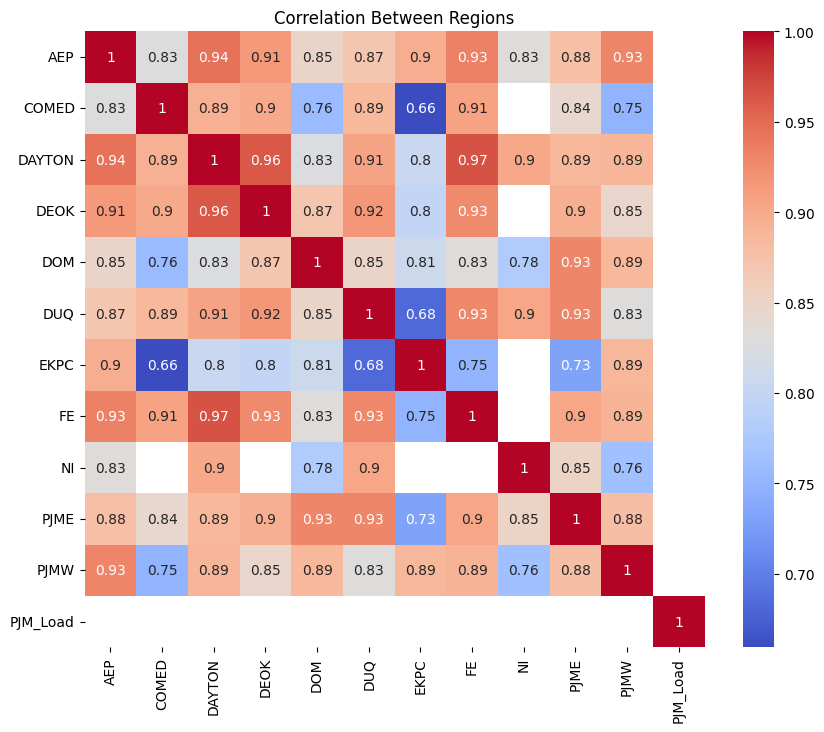

In [12]:
## Checking relationships between regions
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Between Regions')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_12340\2418276270.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg  =df_cleaned.resample("M").mean()


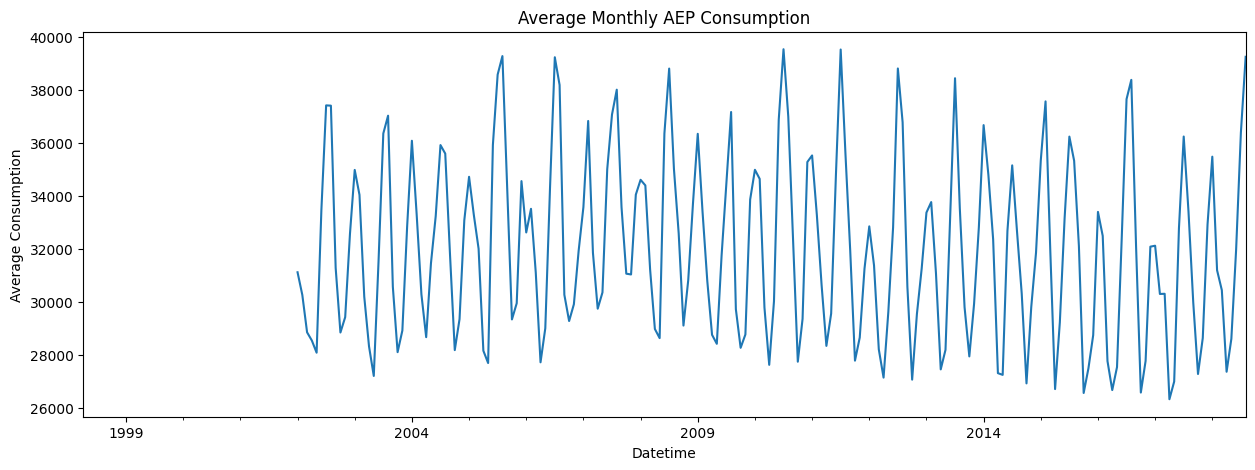

In [13]:
## Average consumption by month
monthly_avg  =df_cleaned.resample("M").mean()
monthly_avg["PJME"].plot(figsize=(15,5))
plt.title('Average Monthly AEP Consumption')
plt.xlabel("Datetime")
plt.ylabel("Average Consumption")
plt.show()

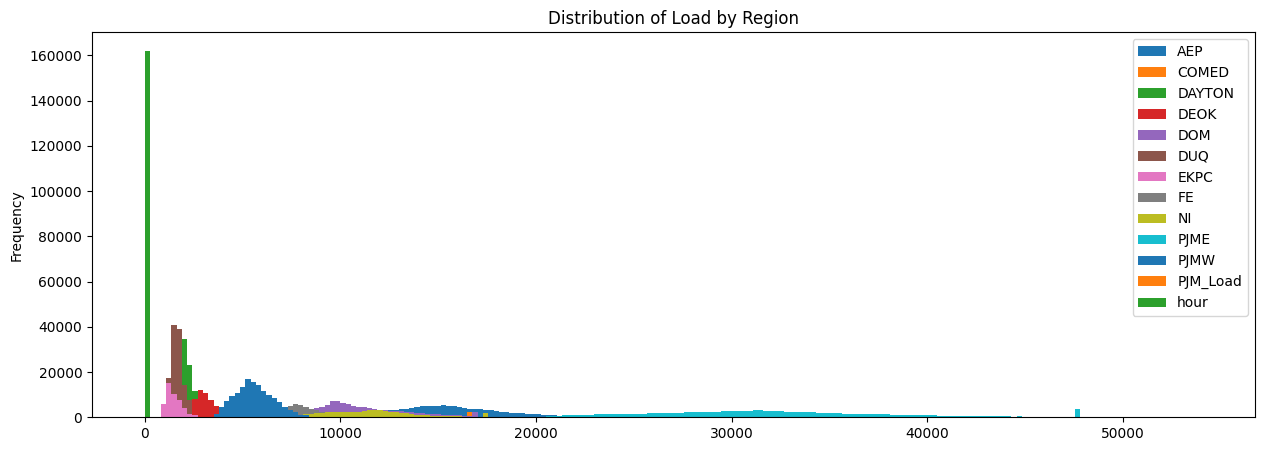

In [16]:
_ = df_cleaned.plot.hist(figsize=(15, 5), bins=200, title='Distribution of Load by Region')